### Generate samples with different m5C/C ratios from ELIGOS dataset

In [35]:
#python code
#generate samples with different mod proportions

import random
import os 

C_base_quality="/home/wuyou/Projects/paper/ELIGOS_normalC/normalC.signal.tsv"
C_read_dict={}
with open(C_base_quality) as f:
    count=0
    for line in f:
        items=line.split("\t")
        id=items[0]
        contig=items[1]
        start=int(items[2])
        seq=items[3]
        #contig_full_length=int(contig.split("_")[1])
        contig_full_length=1358-38
        
        if start<38+20 and len(seq)+20>contig_full_length and "C1" in contig:
            C_read_dict[id]=1
            count+=1
print("normalC read count:",count)


m5C_base_quality="/home/wuyou/Projects/paper/ELIGOS_m5C/m5C.signal.tsv"
m5C_read_dict={}
with open(m5C_base_quality) as f:
    count=0
    for line in f:
        items=line.split("\t")
        id=items[0]
        contig=items[1]
        start=int(items[2])
        seq=items[3]
        #contig_full_length=int(contig.split("_")[1])
        contig_full_length=1358-38
        if start<38+20 and len(seq)+20>contig_full_length and "C1" in contig:
            m5C_read_dict[id]=1
            count+=1
print("m5C read count:",count)


mod_files="ELIGOS_m5C/files_mod.txt"
unmod_files="ELIGOS_normalC/files_unmod.txt"

destination_folders=["m5C/data_stoichiometry/mod_0",
                    "m5C/data_stoichiometry/mod_20",
                    "m5C/data_stoichiometry/mod_40",
                    "m5C/data_stoichiometry/mod_60",
                    "m5C/data_stoichiometry/mod_80",
                    "m5C/data_stoichiometry/mod_100"]

with open(mod_files) as f:

    count=0
    for i,line in enumerate(f):
        read_id=line.split("/")[-1].split(".")[0]
        if read_id not in m5C_read_dict:

            continue

        count+=1
        if count>2000:
            break
        
        if random.random()<0:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[0])
            os.system(cmd)
        if random.random()<0.2:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[1])
            os.system(cmd)
        if random.random()<0.4:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[2])
            os.system(cmd)
        if random.random()<0.6:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[3])
            os.system(cmd)
        if random.random()<0.8:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[4])
            os.system(cmd)
        if random.random()<1:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[5])
            os.system(cmd)
            
with open(unmod_files) as f:
    count=0
    for i,line in enumerate(f):
        read_id=line.split("/")[-1].split(".")[0]
        if read_id not in C_read_dict:
            continue
        count+=1
        if count>2000:
            break
        
        if random.random()>0:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[0])
            os.system(cmd)
        if random.random()>0.2:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[1])
            os.system(cmd)
        if random.random()>0.4:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[2])
            os.system(cmd)
        if random.random()>0.6:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[3])
            os.system(cmd)
        if random.random()>0.8:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[4])
            os.system(cmd)
        if random.random()>1:
            cmd="cp %s %s" %(line.rstrip(),destination_folders[5])
            os.system(cmd)
            


### Generate modification free sample

In [37]:
#generate modification free sample

unmod_files="ELIGOS_normalC/files_unmod.txt"
with open(unmod_files) as f:
    count=0
    for i,line in enumerate(f):
        read_id=line.split("/")[-1].split(".")[0]
        if read_id not in C_read_dict:

            continue

        count+=1
        if count<2000:
            continue
        if count>4000:
            break

        cmd="cp %s %s" %(line.rstrip(),"m5C/data_stoichiometry/CK")
        os.system(cmd)
       

### Modification ratio prediction using Tombo

In [ ]:
#bash code
#tombo modification detection

tombo detect_modifications alternative_model --fast5-basedirs /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0 \
    --statistics-file-basename /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0 \
    --alternate-bases 5mC --processes 36
tombo detect_modifications alternative_model --fast5-basedirs /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20 \
    --statistics-file-basename /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20 \
    --alternate-bases 5mC --processes 36
tombo detect_modifications alternative_model --fast5-basedirs /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40 \
    --statistics-file-basename /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40 \
    --alternate-bases 5mC --processes 36
tombo detect_modifications alternative_model --fast5-basedirs /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60 \
    --statistics-file-basename /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60 \
    --alternate-bases 5mC --processes 36
tombo detect_modifications alternative_model --fast5-basedirs /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80 \
    --statistics-file-basename /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80 \
    --alternate-bases 5mC --processes 36
tombo detect_modifications alternative_model --fast5-basedirs /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100 \
    --statistics-file-basename /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100 \
    --alternate-bases 5mC --processes 36

In [ ]:
#bash code
# produce wig file with estimated fraction of modified reads at each valid reference site

tombo text_output browser_files --statistics-filename mod_0.5mC.tombo.stats \
    --file-types dampened_fraction --browser-file-basename mod_0
tombo text_output browser_files --statistics-filename mod_20.5mC.tombo.stats \
    --file-types dampened_fraction --browser-file-basename mod_20
tombo text_output browser_files --statistics-filename mod_40.5mC.tombo.stats \
    --file-types dampened_fraction --browser-file-basename mod_40
tombo text_output browser_files --statistics-filename mod_60.5mC.tombo.stats \
    --file-types dampened_fraction --browser-file-basename mod_60
tombo text_output browser_files --statistics-filename mod_80.5mC.tombo.stats \
    --file-types dampened_fraction --browser-file-basename mod_80
tombo text_output browser_files --statistics-filename mod_100.5mC.tombo.stats \
    --file-types dampened_fraction --browser-file-basename mod_100

### Modification ratio prediction using xPore

In [ ]:
# xpore installation
#reference Pratanwanich, Ploy N., et al. "Identification of differential RNA modifications from nanopore direct RNA sequencing with xPore." Nature biotechnology 39.11 (2021): 1394-1402.

conda create -n xpore python=3.8 #xpore requires torch <1.6.0, create a new environment
conda activate xpore
pip install xpore==0.5.6    

In [ ]:
#bash code


#guppy basecalling
guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0 \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &

guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20 \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &

guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40 \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &

guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60 \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &

guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80 \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &

guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100 \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &


guppy_basecaller -i /home/wuyou/Projects/paper/m5C/data_stoichiometry/CK \
-s /home/wuyou/Projects/paper/m5C/data_stoichiometry/CK_guppy \
--num_callers 40 --recursive --fast5_out --config rna_r9.4.1_70bps_hac.cfg &



#mapping
minimap2 -ax map-ont -uf -t 3 --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy/pass/mod_0.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_0.sorted.bam

minimap2 -ax map-ont -uf -t 3 --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy/pass/mod_20.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_20.sorted.bam

minimap2 -ax map-ont -uf -t 3  --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy/pass/mod_40.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_40.sorted.bam

minimap2 -ax map-ont -uf -t 3 --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy/pass/mod_60.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_60.sorted.bam

minimap2 -ax map-ont -uf -t 3 --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy/pass/mod_80.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_80.sorted.bam

minimap2 -ax map-ont -uf -t 3 --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy/pass/mod_100.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_100.sorted.bam


minimap2 -ax map-ont -uf -t 3 --secondary=no /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/CK_guppy/pass/CK.fastq \
| samtools sort -o  /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/CK.sorted.bam



#index bam files
for file in *.bam
do
samtools index $file
done


#naopolish index
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy/pass/mod_0.fastq
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy/pass/mod_20.fastq
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy/pass/mod_40.fastq
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy/pass/mod_60.fastq
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy/pass/mod_80.fastq
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy/pass/mod_100.fastq
nanopolish index -d /home/wuyou/Projects/paper/m5C/data_stoichiometry/CK \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/CK_guppy/pass/CK.fastq


#nanopolish eventalign 
nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy/pass/mod_0.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_0.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_0.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_0.eventalign.txt &

nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy/pass/mod_20.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_20.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_20.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_20.eventalign.txt &

nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy/pass/mod_40.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_40.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_40.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_40.eventalign.txt &

nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy/pass/mod_60.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_60.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_60.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_60.eventalign.txt &


nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy/pass/mod_80.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_80.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_80.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_80.eventalign.txt &


nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy/pass/mod_100.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_100.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_100.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_100.eventalign.txt &


nanopolish eventalign --reads /home/wuyou/Projects/paper/m5C/data_stoichiometry/CK_guppy/pass/CK.fastq \
--bam /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/CK.sorted.bam \
--genome /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--signal-index \
--scale-events \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/CK.summary.txt \
--threads 32 > /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/CK.eventalign.txt &



#xpore data prep
xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_0.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_0 \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_0.summary.txt &

xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_20.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_20 \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_20.summary.txt &

xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_40.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_40 \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_40.summary.txt &

xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_60.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_60 \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_60.summary.txt &

xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_80.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_80 \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_80.summary.txt &

xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_100.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_100 \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/mod_100.summary.txt &


xpore-dataprep \
--eventalign /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/CK.eventalign.txt \
--out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/dataprep_CK \
--summary /home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/CK.summary.txt &


xpore-diffmod --config config_0.yml

### Modification ratio prediction using TandemMod

In [ ]:
#bash code
#tombo resquiggle

tombo resquiggle --overwrite --basecall-group Basecall_1D_000 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--processes 40 --fit-global-scale --include-event-stdev --ignore-read-locks &

tombo resquiggle --overwrite --basecall-group Basecall_1D_000 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--processes 40 --fit-global-scale --include-event-stdev --ignore-read-locks &

tombo resquiggle --overwrite --basecall-group Basecall_1D_000 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--processes 40 --fit-global-scale --include-event-stdev --ignore-read-locks &

tombo resquiggle --overwrite --basecall-group Basecall_1D_000 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--processes 40 --fit-global-scale --include-event-stdev --ignore-read-locks &

tombo resquiggle --overwrite --basecall-group Basecall_1D_000 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--processes 40 --fit-global-scale --include-event-stdev --ignore-read-locks &

tombo resquiggle --overwrite --basecall-group Basecall_1D_000 \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
--processes 40 --fit-global-scale --include-event-stdev --ignore-read-locks &


#extract signal

find /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy -name "*.fast5" \
> /home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_0.txt
find /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy -name "*.fast5" \
> /home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_20.txt
find /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy -name "*.fast5" \
> /home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_40.txt
find /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy -name "*.fast5" \
> /home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_60.txt
find /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy -name "*.fast5" \
> /home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_80.txt
find /home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy -name "*.fast5" \
> /home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_100.txt

minimap2 -ax map-ont  -t 8 \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0_guppy/pass/mod_0.fastq | samtools sort \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0.bam -T m5C.tmp

minimap2 -ax map-ont  -t 8 \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20_guppy/pass/mod_20.fastq | samtools sort \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20.bam -T m5C.tmp

minimap2 -ax map-ont  -t 8 \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40_guppy/pass/mod_40.fastq | samtools sort \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40.bam -T m5C.tmp

minimap2 -ax map-ont  -t 8 \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60_guppy/pass/mod_60.fastq | samtools sort \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60.bam -T m5C.tmp

minimap2 -ax map-ont  -t 8 \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80_guppy/pass/mod_80.fastq | samtools sort \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80.bam -T m5C.tmp

minimap2 -ax map-ont  -t 8 \
/home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100_guppy/pass/mod_100.fastq | samtools sort \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100.bam -T m5C.tmp


python /home/wuyou/Projects/paper/extract_signal_from_fast5.py --cpu=20 \
--fl=/home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_0.txt \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0 --clip=10 \
-reference /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
-sam /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0.sam

python /home/wuyou/Projects/paper/extract_signal_from_fast5.py --cpu=20 \
--fl=/home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_20.txt \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20 --clip=10 \
-reference /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
-sam /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20.sam

python /home/wuyou/Projects/paper/extract_signal_from_fast5.py --cpu=40 \
--fl=/home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_40.txt \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40 --clip=10 \
-reference /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
-sam /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40.sam

python /home/wuyou/Projects/paper/extract_signal_from_fast5.py --cpu=20 \
--fl=/home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_60.txt \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60 --clip=10 \
-reference /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
-sam /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60.sam

python /home/wuyou/Projects/paper/extract_signal_from_fast5.py --cpu=20 \
--fl=/home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_80.txt \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80 --clip=10 \
-reference /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
-sam /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80.sam

python /home/wuyou/Projects/paper/extract_signal_from_fast5.py --cpu=20 \
--fl=/home/wuyou/Projects/paper/m5C/data_stoichiometry/files_mod_100.txt \
-o /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100 --clip=10 \
-reference /home/wuyou/Projects/paper/data/ELIGOS_C.fasta \
-sam /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100.sam


python /home/wuyou/Projects/paper/extract_feature_from_signal.py \
-signal_file /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0.signal.tsv \
-clip 10 -label mod_0 -out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/ &

python /home/wuyou/Projects/paper/extract_feature_from_signal.py \
-signal_file /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20.signal.tsv \
-clip 10 -label mod_20 -out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/ &

python /home/wuyou/Projects/paper/extract_feature_from_signal.py \
-signal_file /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40.signal.tsv \
-clip 10 -label mod_40 -out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/ &

python /home/wuyou/Projects/paper/extract_feature_from_signal.py \
-signal_file /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60.signal.tsv \
-clip 10 -label mod_60 -out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/ &

python /home/wuyou/Projects/paper/extract_feature_from_signal.py \
-signal_file /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80.signal.tsv \
-clip 10 -label mod_80 -out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/ &

python /home/wuyou/Projects/paper/extract_feature_from_signal.py \
-signal_file /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100.signal.tsv \
-clip 10 -label mod_100 -out_dir /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/ &

python /home/wuyou/Projects/paper/test_attention_predict.py \
-feature /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0 \
-out /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0.results


python /home/wuyou/Projects/paper/test_attention_predict.py \
-feature /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20 \
-out /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20.results

python /home/wuyou/Projects/paper/test_attention_predict.py \
-feature /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40 \
-out /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40.results

python /home/wuyou/Projects/paper/test_attention_predict.py \
-feature /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60 \
-out /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60.results

python /home/wuyou/Projects/paper/test_attention_predict.py \
-feature /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80 \
-out /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80.results

python /home/wuyou/Projects/paper/test_attention_predict.py \
-feature /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100 \
-out /home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100.results

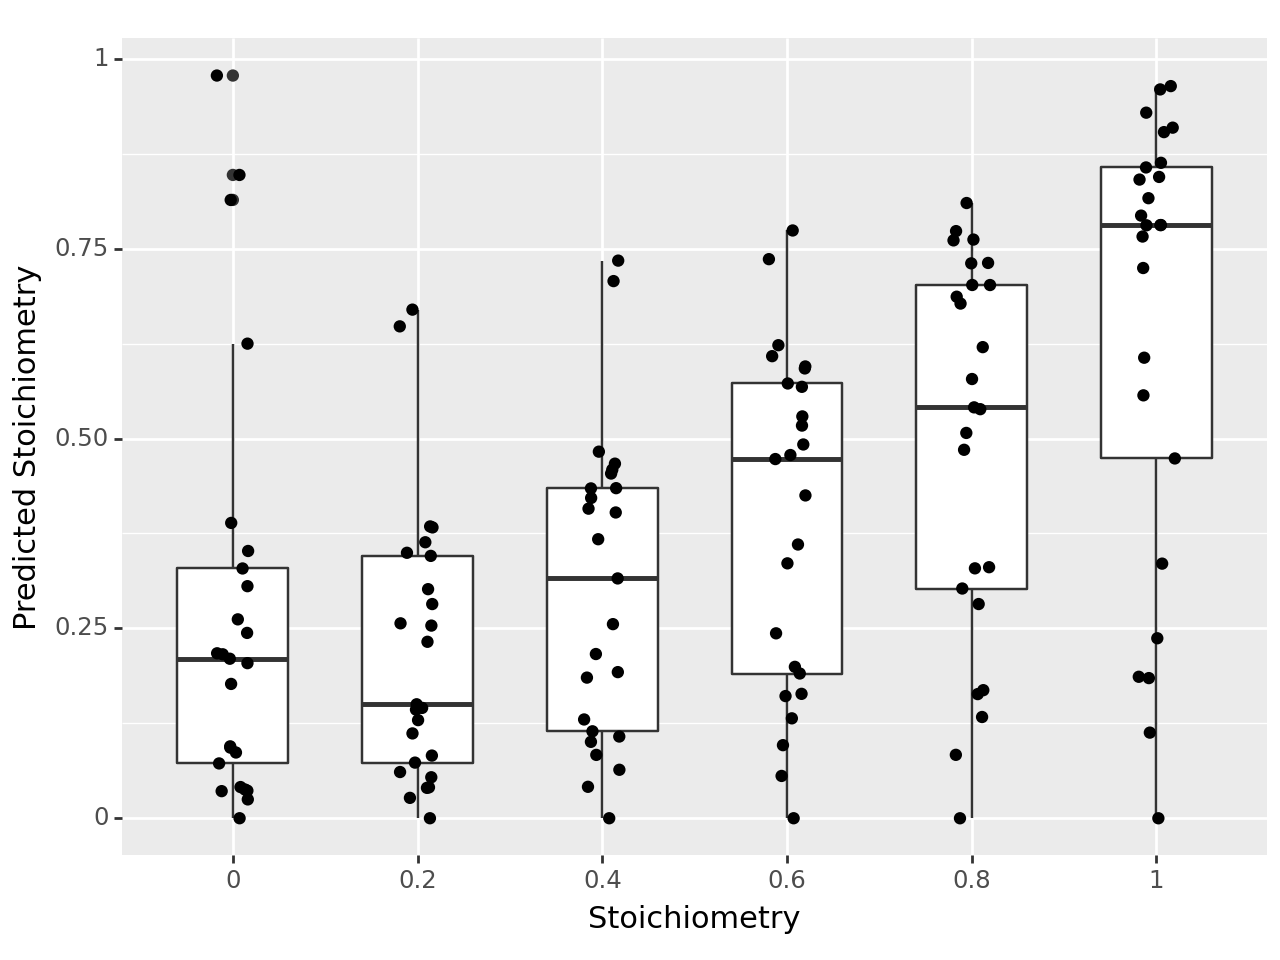

In [5]:
#tombo stoichiometry prediction plot

import pandas as pd
from plotnine import *

files=["/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_0.dampened_fraction_modified_reads.plus.wig",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_20.dampened_fraction_modified_reads.plus.wig",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_40.dampened_fraction_modified_reads.plus.wig",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_60.dampened_fraction_modified_reads.plus.wig",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_80.dampened_fraction_modified_reads.plus.wig",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/mod_100.dampened_fraction_modified_reads.plus.wig"]

stoi_dict={0:"0",1:"0.2",2:"0.4",3:"0.6",4:"0.8",5:"1"}
X,Y,methods=[],[],[]
for i,file in enumerate(files):
    with open(file) as f:
        for j,line in enumerate(f):
            line=line.rstrip()
            if len(line.split(" "))==2 and j%10==0:
                mod_rate=float(line.split(" ")[1])
                X.append(stoi_dict[i])
                Y.append(mod_rate)
                methods.append("tombo")

data=pd.DataFrame({"Stoichiometry":X,"Predicted Stoichiometry":Y})

p=(ggplot(data, aes(x='Stoichiometry', y='Predicted Stoichiometry'))
    + geom_boxplot(width = 0.6)
    + geom_jitter(width = 0.1)
    + scale_x_discrete()
  )
print(p)

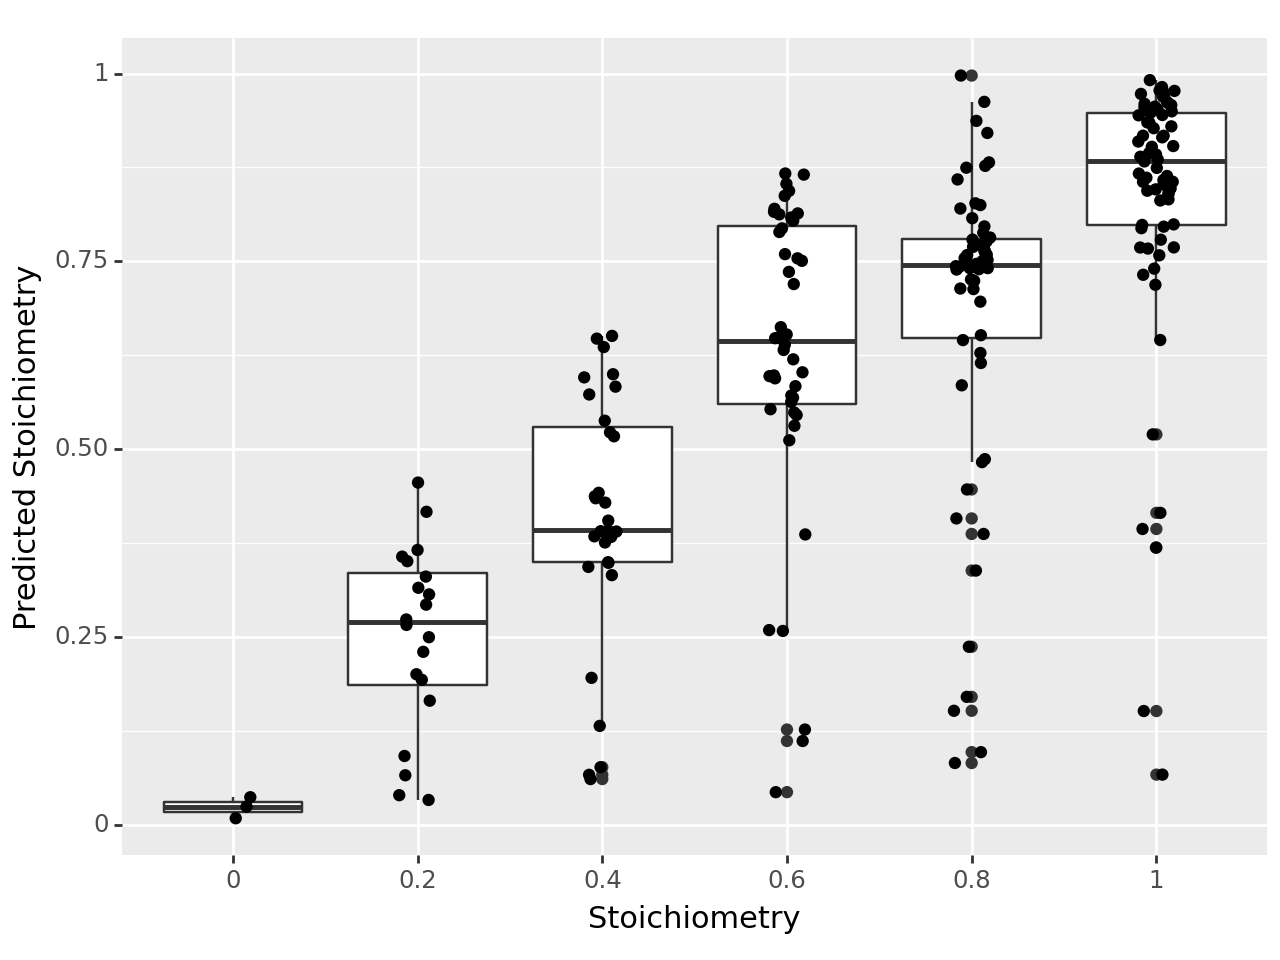

In [15]:
#xpore stoichiometry prediction plot

import pandas as pd
from plotnine import *

files=["/home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/out_0/diffmod.table",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/out_20/diffmod.table",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/out_40/diffmod.table",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/out_60/diffmod.table",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/out_80/diffmod.table",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/xpore/out_100/diffmod.table"]

stoi_dict={0:"0",1:"0.2",2:"0.4",3:"0.6",4:"0.8",5:"1"}
X,Y=[],[]
kmer_dict={}
for i,file in enumerate(files):
    with open(file) as f:
        for j,line in enumerate(f):
            line=line.rstrip()
            if "C1" in line:
                kmer=line.split(",")[2]
                pval=float(line.split(",")[4])
                if kmer[2] != "C"  or j%2!=0 :
                    continue
                if kmer not in kmer_dict:
                    kmer_dict[kmer]=[0,0]
                kmer_dict[kmer][1]+=1
                
                mod_rate=abs(float(line.split(",")[3]))
                X.append(stoi_dict[i])
                Y.append(mod_rate)
                methods.append("xPore")
data=pd.DataFrame({"Stoichiometry":X,"Predicted Stoichiometry":Y})

p=(ggplot(data, aes(x='Stoichiometry', y='Predicted Stoichiometry'))
    + geom_boxplot()
    + geom_jitter(width = 0.1)
    + scale_x_discrete()
  )
print(p)

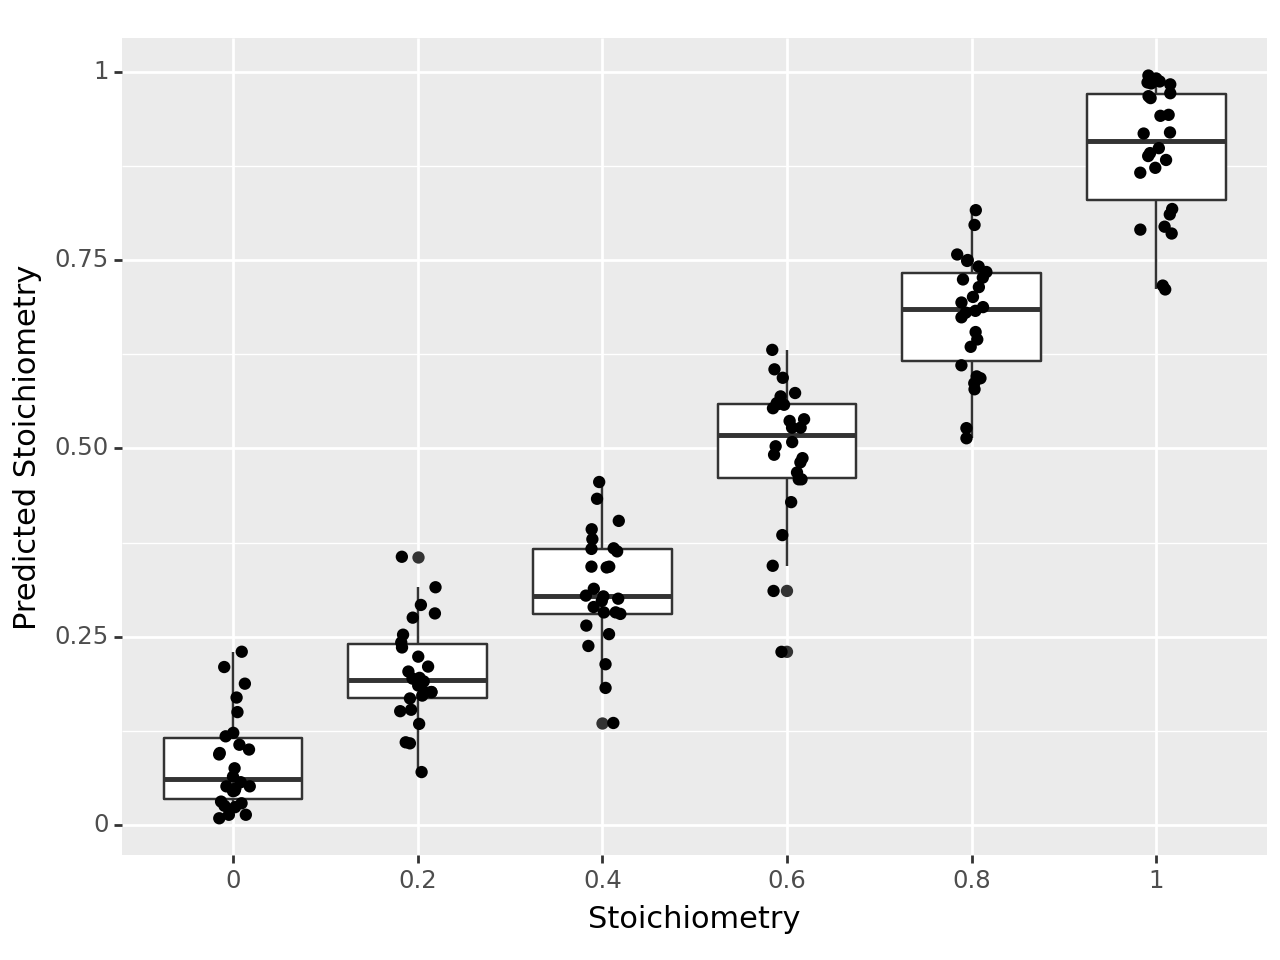

In [14]:
#attention plot
import pandas as pd
from plotnine import *
files=["/home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_0.results",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_20.results",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_40.results",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_60.results",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_80.results",
       "/home/wuyou/Projects/paper/m5C/data_stoichiometry/attention/mod_100.results"]

stoi_dict={0:"0",1:"0.2",2:"0.4",3:"0.6",4:"0.8",5:"1"}
X,Y=[],[]
for i,file in enumerate(files):
    mod_rate_dict={}
    with open(file) as f:
        for j,line in enumerate(f):
            line=line.rstrip()
            id="_".join([line.split("\t")[0],line.split("\t")[1]])
            if id not in mod_rate_dict:
                mod_rate_dict[id]=[0,0]
            if line.split("\t")[4]=="m5C":
                mod_rate_dict[id][0]+=1
            mod_rate_dict[id][1]+=1
    for k,id in enumerate(mod_rate_dict):
        if mod_rate_dict[id][1]<20:
            continue
        if k%10==0:
            X.append(stoi_dict[i])
            Y.append(mod_rate_dict[id][0]/mod_rate_dict[id][1])
            methods.append("TandemMod")

data=pd.DataFrame({"Stoichiometry":X,"Predicted Stoichiometry":Y})


p=(ggplot(data, aes(x='Stoichiometry', y='Predicted Stoichiometry'))
    + geom_boxplot()
    + geom_jitter(width = 0.1)
    + scale_x_discrete()
  )
print(p)

### Merge plot

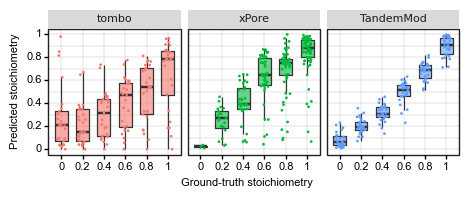

/home/wuyou/.conda/envs/SQANTI3.env/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5.3 x 1.64 in image.
/home/wuyou/.conda/envs/SQANTI3.env/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/compare_with_other_tools.pdf


In [7]:
import pandas as pd
from plotnine import *

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"

data=pd.DataFrame({"Ground-truth stoichiometry":X,"Predicted stoichiometry":Y,"Method":methods})
data['Method'] = pd.Categorical(data.Method, categories=pd.unique(data.Method))  #reorder legend

p = (ggplot(data, aes(x='Ground-truth stoichiometry', y='Predicted stoichiometry',fill="Method"))
        #+geom_line(pd.DataFrame(dict(x=[1,0],y=[0,1])),aes(x="x",y="y"),linetype="dashed")
        
        + geom_boxplot(width=0.6,alpha=0.6,outlier_size=0.2,outlier_alpha=0,position=position_dodge(0.8))
        + geom_jitter(data, aes(x='Ground-truth stoichiometry', y='Predicted stoichiometry',fill="Method",color="Method"),size=0.1,width=0.2)
        
        #+ scale_x_discrete()
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 8),            #facet font size
            legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=8,family="Arial",color="black"),
            axis_title_x=element_text(size=8,family="Arial",color="black"),
            axis_title_y=element_text(size=8,family="Arial",color="black"),
            
            figure_size=[5.3,1.64],
            legend_title = element_text(size=8), #change legend title font size
            legend_text = element_text(size=8),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.45,0.4), 
            legend_key_size=12) #change legend text font size)
        #+labs(x = "Recall", y ="Precisioin")
        #+guides(color = guide_legend(title = "Probability cutoff"))
        + scale_y_continuous(breaks=[0,0.2,0.4,0.6,0.8,1])
        + scale_color_manual(values=[c1, c2, c3])     
        + scale_fill_manual(values=[c1, c2, c3])    
        + facet_wrap('Method')
        )
print(p)
p.save('figure/compare_with_other_tools.pdf')

In [9]:
# pearsonr between predicted stoichiometry and ground truth

from scipy.stats import pearsonr
data=pd.DataFrame({"Stoichiometry":X,"Predicted Stoichiometry":Y,"Method":methods})

In [20]:
data1=data[data["Method"]=="tombo"]
x=data1["Stoichiometry"].values
x=[float(item) for item in x]
y=data1["Predicted Stoichiometry"].values
r=pearsonr(x,y)

(0.4945566512935805, 1.2560624742909333e-10)

In [21]:
data1=data[data["Method"]=="xpore"]
x=data1["Stoichiometry"].values
x=[float(item) for item in x]
y=data1["Predicted Stoichiometry"].values
pearsonr(x,y)

(0.7116412022861047, 3.3648219789547265e-36)

In [22]:
data1=data[data["Method"]=="demMod"]
x=data1["Stoichiometry"].values
x=[float(item) for item in x]
y=data1["Predicted Stoichiometry"].values
pearsonr(x,y)

(0.956491476556098, 2.7577977760389807e-84)